In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/novel-corona-virus-2019-dataset/2019_nCoV_data.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv
/kaggle/input/novel-corona-virus-2019-dataset/COVID19_open_line_list.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv
/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv
/kaggle/input/novel-corona-virus-2019-dataset/COVID19_line_list_data.csv


In [125]:
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv(os.path.join(dirname,filename))
df

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,...,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,...,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,...,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,...,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,1081,2.0,2/25/2020,NaN,"new COVID-19 patient confirmed in Austria: 24,...",Innsbruck,Austria,NaN,24.0,NaN,...,0,NaN,Jakarta Post,https://www.thejakartapost.com/news/2020/02/25...,NaN,NaN,NaN,NaN,NaN,NaN
1081,1082,1.0,2/24/2020,NaN,new COVID-19 patient confirmed in Afghanistan:...,Afghanistan,Afghanistan,NaN,35.0,NaN,...,0,NaN,Fox News,https://www.foxnews.com/health/afghanistan-fir...,NaN,NaN,NaN,NaN,NaN,NaN
1082,1083,1.0,2/26/2020,NaN,new COVID-19 patient confirmed in Algeria: mal...,Algeria,Algeria,male,NaN,NaN,...,0,NaN,South China Morning Post,https://www.scmp.com/news/china/society/articl...,NaN,NaN,NaN,NaN,NaN,NaN
1083,1084,1.0,2/25/2020,NaN,new COVID-19 patient confirmed in Croatia: mal...,Croatia,Croatia,male,NaN,NaN,...,0,NaN,Reuters,https://www.reuters.com/article/us-croatia-cor...,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
df.describe()


,id,case_in_country,Unnamed: 3,age,If_onset_approximated,visiting Wuhan,from Wuhan,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
count,1085.000000,888.000000,0.0,843.000000,560.000000,1085.000000,1081.000000,0.0,0.0,0.0,0.0,0.0,0.0
mean,543.000000,48.841216,NaN,49.483689,0.042857,0.176959,0.144311,NaN,NaN,NaN,NaN,NaN,NaN
std,313.356825,78.853528,NaN,18.255334,0.202716,0.381810,0.351567,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,NaN,0.250000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,272.000000,11.000000,NaN,35.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,543.000000,28.000000,NaN,51.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,814.000000,67.250000,NaN,64.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
max,1085.000000,1443.000000,NaN,96.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
from sklearn.preprocessing import LabelEncoder
country = df["country"].values
lbl = LabelEncoder()
cases = lbl.fit_transform(country)
unique = np.unique(cases) 

['China' 'Japan' 'South Korea' 'Hong Kong' 'Singapore']


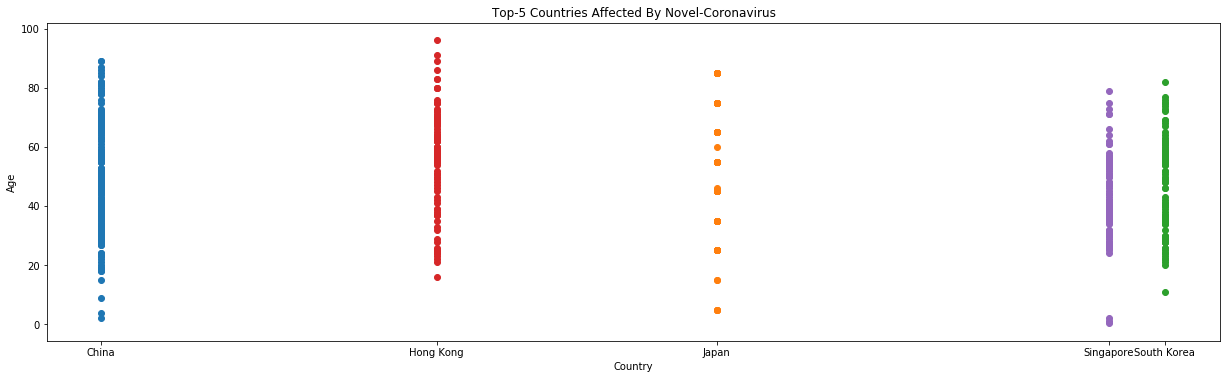

In [123]:

x =  df['age'].values
import copy
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(17,5))
count = [np.count_nonzero(cases==e) for  e in unique]
new_cases =[]
temp = copy.deepcopy(count)
for _  in range(5):

    new_cases.append(count.index(max(temp)))
    temp.remove(max(temp))
    
    
#print(lbl.inverse_transform([new_cases[1]]))
for each,c in zip(new_cases,color):
    ages = [e for i,e in enumerate(df['age']) if df['country'][i]==lbl.inverse_transform([each]
                                                                                        )[0]]
    plt.scatter(cases[cases==each],ages)

labels = lbl.inverse_transform(new_cases)
print(labels)
plt.xticks(ticks=new_cases,labels=labels)


plt.tight_layout()
plt.ylabel('Age')
plt.xlabel('Country')
plt.title("Top-5 Countries Affected By Novel-Coronavirus")
#plt.Axes.tick_params(ax,axis='both', which='major', pad=10)
plt.show()
